# Group Fake News Project
# Part 0: Form Study Groups
* Alf Kristiansen XGV820
* Alexander
* Victor
* Diego

# Part 1: Data Processing
### Task 1: Retrieve sample of FakeNewsCorups
https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv

Check requirements for version control for our libraries used in this project.
- MatPlotLib 
- scikit-learn
- pandas
- NLTK
- pytorch
- numpy

In [1]:
import pandas as pd
import nltk
import re
from nltk.stem.porter import *
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

english_stopwords = stopwords.words('english')
stopwords = stopwords.words('english')

def full_clean(text: str, stopwords=english_stopwords):
    text = text.lower()

    text = re.sub(r'\n', ' ', text) # Remove newlines
    text = re.sub(r' +', ' ', text) # Remove multiple spaces

    text = re.sub(r'([a-zA-Z]+) (\d+)[, ]? (\d{4})', '<DATE>', text) # Date substitution
    text = re.sub(r'([.a-zA-Z0-9]+)@([-a-zA-Z0-9]+).([a-zA-Z]+)', '<EMAIL>', text) # E-Mail substitution
    text = re.sub(r'(https?:\/\/)?(www.)?([-.a-zA-Z0-9]+)[.](co.uk|com|org|net)\/?([\%\-\.\?\_=a-zA-Z0-9\/]+)?', '<URL>', text) # URL substitution
    text = re.sub(r'[0-9]+', '<NUM>', text) # Number substitution

    stemmer = PorterStemmer()                                   # Porter Stemmer from nltk
    tokens = nltk.word_tokenize(text)                           # Tokenizing the text
    tokens = [word for word in tokens if word.isalpha()]        # Removing punctuation
    tokens = [word for word in tokens if word not in stopwords] # Removing Stopwords
    tokens = [stemmer.stem(word) for word in tokens]            # Stemming all the words
    return ' '.join(tokens) # Returning a string consisting of each word in the list

def is_credible(article_type):
    if article_type in ['fake', 'satire', 'conspiracy', 'bias', 'hate', 'junksci']:
        return int(0)
    
    elif article_type in ['clickbait', 'political', 'reliable']:
        return int(1)
    
    else:
        return int(2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alfem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alfem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Task 2: Apply data pre-processing pipeline

In [ ]:
# Retrieve sample of FakeNewsCorpus
df = pd.read_csv("src/995,000_rows.csv", usecols = ["type", "content"]) # **WARNING big file, use local directory**

# Remove na instances
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Omit unnessecary types
omit_types = ['unreliable', 'unknown', 'rumor', 
              '2018-02-10 13:43:39.521661']

for omit_type in omit_types:
    df = df[df.type != omit_type]

# Apply full_clean on dataset
df["content"] = df["content"].apply(full_clean)

# Apply is_credible on dataset
df['type'] = df['type'].apply(is_credible)

# Save Cleaned Data
df.to_csv("src/clean_995000_news.csv", index=False)

# Display Sample Results
print(df[["content"]].head(10))

In [ ]:
# Read "cleaned_995000_news.csv"
new_sample = pd.read_csv("src/clean_995000_news.csv") # **WARNING big file, use local directory**
print(new_sample.head(100))

    type                                            content
0      1  plu one articl googl plu thank ali alfoneh ass...
1      0  cost best senat bank committe jp morgan buy nu...
2      0  man awoken num coma commit suicid learn donald...
3      1  julia geist ask draw pictur comput scientist l...
4      0  num compil studi vaccin danger activist post n...
..   ...                                                ...
95     0  jump navig link page namespac main talk user u...
96     1  editor miep gie num last hid ann frank famili ...
97     0  potenti num gop presidenti candid ben carson s...
98     1  back forth fight trump administr court constit...
99     1  idea smithsonian latino museum born num task f...

[100 rows x 2 columns]


### Task 3: Exploration of proccesed dataset

#### Distribution of types from original dataset

In [ ]:
# Read originial dataset for data exploration
news = pd.read_csv('src/995,000_rows.csv') # **WARNING big file, use local directory**
omit_types = ['unreliable', 'unknown', 'rumor', 
              '2018-02-10 13:43:39.521661']

for omit_type in omit_types:
    news = news[news.type != omit_type]

C:\Users\alfem\AppData\Local\Temp\ipykernel_41952\1381907806.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  news = pd.read_csv('src/995,000_rows.csv')


In [9]:
# Function for counting instances of different types occuring in dataset
def count_types(article_types):
    found_types = {}

    for article_type in article_types:
        if article_type in found_types:
            found_types[article_type] += 1
        else:
            found_types[article_type] = 1

    return found_types

count_types(list(news['type']))

{'political': 194518,
 'fake': 104883,
 'satire': 13160,
 'reliable': 218564,
 'conspiracy': 97314,
 'bias': 133232,
 nan: 47786,
 'clickbait': 27412,
 'hate': 8779,
 'junksci': 14040}

In [10]:
# Count instances of fake or reliabe news
def fake_credible(types: dict):
    labels = [0, 0]
    
    for type in types:
        if type in ['fake', 'satire', 'conspiracy', 'bias', 'hate', 'junksci']:
            labels[0] += types[type]
        elif type in ['clickbait', 'political', 'reliable']:
            labels[1] += types[type]

    return labels

print("For the original dataset:")
fake_credible(count_types(list(news['type'])))


For the original dataset:


[371408, 440494]

#### Vocab: frequency of words in cleaned dataset

In [3]:
vocab = []

for content in new_sample['content']:
    vocab.extend(nltk.word_tokenize(content))

vocab = [word for word in vocab if word.isalpha()]

In [4]:
def count_words(vocab):
    words = {}

    for word in vocab:
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

    return words

In [5]:
# Sort vocab from most frequent to least frequent
sorted_vocab = {k: v for k, v in sorted(count_words(vocab).items(), key = lambda item: item[1], reverse=True)}

In [6]:
# New dataframe for the 10000 most frequent words
frequent_words_10k = pd.DataFrame({'word': list(sorted_vocab)[:10000]})
# Exporting dataframe to new csv filde
frequent_words_10k.to_csv("src/frequent_words_10k.csv")

In [7]:
# 10000 most frequent words
frequent_words_10k = dict(list(sorted_vocab.items()))
frequent_words_10k

{'num': 7386598,
 'said': 1192745,
 'one': 869736,
 'new': 817397,
 'would': 782571,
 'time': 781390,
 'state': 707026,
 'peopl': 704747,
 'year': 704408,
 'like': 663285,
 'also': 534112,
 'say': 479711,
 'make': 473540,
 'use': 470030,
 'us': 454982,
 'get': 452017,
 'go': 438699,
 'even': 433049,
 'work': 420898,
 'govern': 410175,
 'american': 403433,
 'two': 401558,
 'presid': 401314,
 'report': 398169,
 'could': 396724,
 'continu': 392624,
 'first': 390600,
 'mani': 389326,
 'stori': 384640,
 'read': 382306,
 'nation': 363569,
 'right': 359977,
 'day': 350528,
 'take': 347066,
 'world': 344425,
 'last': 338565,
 'way': 332397,
 'think': 330434,
 'want': 327039,
 'trump': 325470,
 'know': 322127,
 'call': 321342,
 'york': 320009,
 'url': 319339,
 'may': 318131,
 'news': 313463,
 'come': 309473,
 'countri': 306213,
 'need': 305071,
 'includ': 299840,
 'see': 294350,
 'obama': 287914,
 'back': 279592,
 'much': 277254,
 'unit': 274595,
 'well': 272231,
 'tri': 269833,
 'show': 269544

In [8]:
print('Amount of URLS:', sorted_vocab['url'])
print('Amount of Dates:', sorted_vocab['date'])
print('Amount of Numbers:', sorted_vocab['num'])
print('Amount of Emails:', sorted_vocab['email'])

Amount of URLS: 319339
Amount of Dates: 259170
Amount of Numbers: 7386598
Amount of Emails: 153647


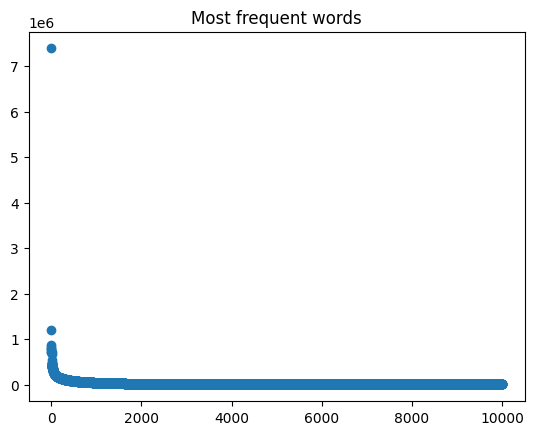

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(list(range(10000)), list(sorted_vocab.values())[:10000])
plt.title('Most frequent words')
plt.show()

The graph of most frequent words follow Zipf's law (which is a powerlaw)

### Task 4: split data
We use the sklearn train_test_split function to split the data into the different sets

In [10]:
from sklearn.model_selection import train_test_split

new_sample = new_sample[2:]

X = new_sample.drop(columns=["content"]).values  # Feature columns
y = new_sample["type"].values  # Target column

# 80% training and 20% rest for validation and test
X_train, X_vt, y_train, y_vt = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Split 20% into 10% validation and 10% test
X_test, X_val, y_test, y_val = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0, stratify=y_vt)

# Print number of samples in each dataset
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 530841
Validation set size: 66356
Test set size: 66355


# Part 2: Simple Logitstic Regression

* Binary classification: `reliabe` or `fake`

### Task 0: Label grouping
0: `fake`
1: `reliable`

From part 1 task 1 we've defined a function `is_credible()` and classified the types into reliable or fake by using binary classification.

### Task 1: Logistic regression classifier
* Fixed vocab of 10000 most frequent words.

* F1 score

In [16]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re

# 10000 most frequent words
freq_words = pd.read_csv('src/frequent_words_10k.csv')

def text_to_features(text, vocab):
    """Convert text into a word frequency vector based on a fixed vocabulary."""
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenization using regex
    word_counts = Counter(words)  # Count occurrences of each word
    return [word_counts.get(word, 0) for word in vocab]  # Keep only vocab words

# Apply Function to the Entire Dataset
X = np.array([text_to_features(content, freq_words) for content in new_sample["content"]])
y = new_sample["type"].values  # Target variable

# Train/Test Split (80% Train, 10% Validation, 10% Test)
X_train, X_vt, y_train, y_vt = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0, stratify=y_vt)

# Train Logistic Regression Model
modelLog = LogisticRegression(max_iter=500, solver="lbfgs", C=1.0)
modelLog.fit(X_train, y_train)

# Make Predictions
y_pred = modelLog.predict(X_val)

# Evaluate Model Performance
accuracy_val = accuracy_score(y_val, y_pred)
f1_val = f1_score(y_val, y_pred)

# Print Results
print("Logistic Regression Accuracy on validation set: ", accuracy_val)
print("Logistic Regression F1-score on validation set: ", f1_val)

Logistic Regression Accuracy on validation set:  0.5629869640569664
Logistic Regression F1-score on validation set:  0.719918094538992


### Task 3: Apply preproccessing pipeline to scraped reliable data

In [12]:
target_news = pd.read_csv("src/bbc_news.csv")
target_news["content"] = target_news["content"].apply(full_clean)
target_news.to_csv("src/clean_bbc_news.csv", index=False)

In [13]:
new_news = pd.read_csv("src/clean_bbc_news.csv")

# Transform the "content" Column into Word Count Vectors
X_new = np.array([text_to_features(content, freq_words) for content in new_news["content"]])

# Predict Fake or Reliable
new_predictions = modelLog.predict(X_new)

# Store Results
new_news["prediction"] = new_predictions  # Append predictions to the dataset

# Save Predictions to a CSV File
new_news.to_csv("src/classified_bbc_news.csv", index=False)

# Display Results
print(new_news[["content", "prediction"]].head(10))  # Show first 10 predictions

                                             content  prediction
0  denmark postal servic postnord end letter deli...           1
1  eu leader gather brussel thursday special coun...           1
2  summit mark major signific manifest reset rela...           1
3  cleaner scrub debat chamber clean mp arriv wed...           1
4  british man captur fight ukrain arm forc jail ...           1
5  whether ukrain presid volodymyr zelenski decis...           1
6  pope franci woke num num local time num num gm...           1
7  ten thousand romanian march bucharest victori ...           1
8  certainli one way focus mind wallet donald tru...           1
9  friedrich merz expect becom germani next chanc...           1


In [14]:
classified_news = pd.read_csv("src/classified_bbc_news.csv")
classified_news["prediction"]

def counting(classified):
    reliable = 0
    fake = 0

    for classification in classified:
        if classification == 0 :
            fake += 1
        elif classification == 1:
            reliable += 1

    return (f"classified articles fake: {fake}, and reliable: {reliable}")

counting(list(classified_news['prediction']))

'classified articles fake: 0, and reliable: 672'

# Part 3: Advanced model

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Ensuring reproducibility
np.random.seed(0)
torch.manual_seed(0)

# Load data frequent words
freq_words = pd.read_csv("src/frequent_words_10k.csv")
frequent_words = set(freq_words['word'].astype(str).str.strip())

# load articles dataset
articles = pd.read_csv(r"C:\Users\45422\Documents\cleaned_995000_news.csv") #locally downloaded "/clean_995000_news.csv"
articles.columns = articles.columns.str.strip()
articles['content'] = articles['content'].astype(str)


# Filter only top 10000 words
def filter_article(text, allowed_words):
    tokens = text.split()
    return ' '.join([word for word in tokens if word in allowed_words])

articles['filtered_content'] = articles['content'].apply(lambda x: filter_article(x, frequent_words))
# drop empty 
articles = articles[articles['filtered_content'].str.strip().astype(bool)].reset_index(drop=True)


# TF-IDF vectorization  sparse, every article is a vector of the TF-IDF numerical values only non-zero
vectorizer = TfidfVectorizer(max_features=10000)
X_sparse = vectorizer.fit_transform(articles['filtered_content'])
# label binary values
y = articles['type'].astype(int).values


# Train/Val/Test split
X_train, X_vt, y_train, y_vt = train_test_split(X_sparse, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)


# Define neural network (inherited form the torch.nn.module class)
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        # Setup in layers
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()

        # Feed forward, how the data flows
    def forward(self, x):
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.sigmoid(self.fc2(x))
        return x

# Model setup
input_size = X_sparse.shape[1]
model = NeuralNetwork(input_size)
# Error function - binary cross entropy 
loss_fn = nn.BCELoss()
# Adam algorithm for stochastic gradient descent, lr = learning rate, weight_decay = penalty for large weights (prevent overfitting)
optimizer = optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-5)


# Model training loop, manual batching, only converting to dense (tensor) when needed
# Batch = articles at a time
batch_size = 128
# Epochs = how many times the model will go though all training data (too many times = over fitting)
epochs = 10

for epoch in range(epochs):
    model.train()
    train_loss = 0
    # Get training data in random order across epochs
    permutation = np.random.permutation(X_train.shape[0])

    for i in range(0, X_train.shape[0], batch_size):
        batch_indices = permutation[i:i + batch_size]
        X_batch_sparse = X_train[batch_indices]
        y_batch = y_train[batch_indices]

        # Sparse to dense (just for batch)
        X_batch_dense = torch.tensor(X_batch_sparse.toarray(), dtype=torch.float32)
        y_batch_tensor = torch.tensor(y_batch, dtype=torch.float32).view(-1, 1)

        # Forward pass
        outputs = model(X_batch_dense)
        loss = loss_fn(outputs, y_batch_tensor)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()* X_batch_dense.size(0)

    # Validation
    model.eval()
    with torch.no_grad():
        X_val_tensor = torch.tensor(X_val.toarray(), dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
        val_outputs = model(X_val_tensor)
        val_loss = loss_fn(val_outputs, y_val_tensor).item()

    avg_train_loss = train_loss / X_train.shape[0]
    print(f"Epoch {epoch + 1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {val_loss:.4f}")

# Part 4: Evaluation
### Task 1: 
#### Logistic Regression model on test-data

In [17]:
# Make Predictions
y_pred = modelLog.predict(X_test)

# Evaluate Model Performance
accuracy_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

# Print Results
print("Logistic Regression Accuracy on test set: ", accuracy_test)
print("Logistic Regression F1-score on test set: ", f1_test)

Logistic Regression Accuracy on test set:  0.5630086201699922
Logistic Regression F1-score on test set:  0.7198709340855738


#### Neural Network model on test-data:

In [ ]:
# Evaluate / test 
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test.toarray(), dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
    
    y_pred_probs = model(X_test_tensor)
    y_pred_labels = (y_pred_probs >= 0.5).float()

    accuracy = accuracy_score(y_test_tensor.numpy(), y_pred_labels.numpy())
    f1 = f1_score(y_test_tensor.numpy(), y_pred_labels.numpy())

    print(f'Test Accuracy: {accuracy:.4f} | f1 score: {f1:.4f}')
    print(classification_report(y_test_tensor.numpy(), y_pred_labels.numpy()))
    print(confusion_matrix(y_test_tensor.numpy(), y_pred_labels.numpy()))

### Task 2:
#### Logistic Regression model on LIAR dataset:

In [ ]:
liar_test = pd.read_csv('liar_dataset/test.tsv', sep='\t', header=None, 
                        usecols=[1,2]).rename(columns={1:'type', 2:'content'})
liar_test

def is_credible_liar(article_type):
    if article_type in ['false', 'pants-fire', 'barely-true']:
        return 0
    elif article_type in ['half-true', 'mostly-true', 'true']:
        return 1
    
liar_test['content'] = liar_test['content'].apply(full_clean)
liar_test['type'] = liar_test['type'].apply(is_credible_liar)

liar_test.to_csv('src/clean_liar_test.csv')

NameError: name 'pd' is not defined

In [ ]:
liar_test = pd.read_csv('src/clean_liar_test.csv')

# Transform the "content" Column into Word Count Vectors
X_liar = np.array([text_to_features(content, freq_words) for content in liar_test["content"]])
y_liar = liar_test["type"].values  # Target variable

# Store Results
liar_test["prediction"] = new_predictions  # Append predictions to the dataset

# Display Results
print(liar_test[["content", "prediction"]].head(10))  # Show first 10 predictions

# Make Predictions
y_pred = modelLog.predict(X_liar)

# Evaluate Model Performance
accuracy_test = accuracy_score(y_liar, y_pred)
f1_test = f1_score(y_liar, y_pred)

# Print Results
print("Logistic Regression Accuracy on test set: ", accuracy_test)
print("Logistic Regression F1-score on test set: ", f1_test)

#### Neural Network model on LIAR dataset:

In [ ]:

# Liars dataset test using the model form before
liar_articles = pd.read_csv("src/clean_liar_test.csv")
liar_articles.columns = liar_articles.columns.str.strip()
liar_articles['content'] = liar_articles['content'].astype(str)

#filter for 10000 most freq words
liar_articles['filtered_liar'] = liar_articles['content'].apply(lambda x: filter_article(x, frequent_words))
# drop empty 
liar_articles = liar_articles[liar_articles['filtered_liar'].str.strip().astype(bool)].reset_index(drop=True)


# TF-IDF vectorization  sparse, every article is a vector of the TF-IDF numerical values only non-zero
X_sparse_liar = vectorizer.transform(liar_articles['filtered_liar'])
# label binary values
y_liar = liar_articles['type'].astype(int).values

with torch.no_grad():
    X_liar_tensor = torch.tensor(X_sparse_liar.toarray(), dtype=torch.float32)
    y_liar_tensor = torch.tensor(y_liar, dtype=torch.float32).view(-1, 1)
    
    y_pred_probs_liar = model(X_liar_tensor)
    y_pred_labels_liar = (y_pred_probs_liar >= 0.5).float()

    accuracy_liar = accuracy_score(y_liar_tensor.numpy(), y_pred_labels_liar.numpy())
    f1_liar = f1_score(y_liar_tensor.numpy(), y_pred_labels_liar.numpy())
    
    print(f'Test Accuracy: {accuracy_liar:.4f} | f1 score: {f1_liar:.4f}')
    print(classification_report(y_liar_tensor.numpy(), y_pred_labels_liar.numpy()))
    print(confusion_matrix(y_liar_tensor.numpy(), y_pred_labels_liar.numpy()))